# Ensemble Learning
Ensemble learning = Many models working together like a team.
Ensemble learning is a machine learning method where many models are trained and then combined to solve the same problem. The goal is to get better accuracy and more reliable results than using just one model

##  Why do we do this?
A single model can make mistakes.

But different models make different mistakes.

Combining them reduces errors and gives a stronger final result.

## Model can be different in three ways:
1. Using the same algorithm but diffrent data.
2. Using different data and same algorithm.
3. Combination of both.

## Types of Ensemble learning
1. Voting ( soft voting and hard voting)
2. Stacking
3. Bagging (Random forest)
4. Boosting ( Adaboost Algorithm)

##  Voting
 All model using the same data but different algorithm.
 #### for example
 Many models (like decision trees, logistic regression, SVM, etc.).
 Each one gives its own prediction for the same data point.
 ### Classification problem
 And prediction for classification problem is based on majority count.
 for example if most of the model predict true then the final prediction will be true.
 
 ### For Regression problem
 calculate the mean of all the model output.

### Voting means:

collect all the predictions,

Then pick the final answer based on what most models say

##### for example:Asking a group of friends: Is this picture a cat or a dog?
If most friends say "cat",“cat” as the final answer.



## Types of Voting
1. Hard voting
2. Soft Voting

## Hard Voting
Each model votes for a class label (e.g., cat or dog).

The class with the most votes wins.

It doesnot care how confident each model is just the majority.

<b><i>Hard Voting = Majority vote</i></b>

### Example

**Model 1** says: Cat

**Model 2** says: Dog

**Model 3** says: Cat
→ **Final:** Cat (because 2 out of 3 said Cat)

## Soft Voting
Each model predicts probabilities for each class.

**Soft Voting = Average probabilities, then pick the highest.**

**For example:** 70% cat, 30% dog.

The probabilities are averaged.

The final class is the one with the highest average probability.

### Example
**Model 1**: Cat 80%, Dog 20%

**Model 2:** Cat 60%, Dog 40%

**Model 3:** Cat 40%, Dog 60%

**Average:** 
Cat = (80+60+40)/3 = 60%
Dog = (20+40+60)/3 = 40%
→ **Final:** Cat

###  In Simple Words
Hard Voting: “Who gets the most votes?”

Soft Voting: “Who has the highest average chance?”

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
## creating base model
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

In [5]:
## Hard voting
hard_voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('knn', clf3)
    ],
    voting='hard'  # This means hard voting
)

In [6]:
# Train
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())])

In [7]:
# Predict
y_pred_hard = hard_voting.predict(X_test)


In [8]:
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

Hard Voting Accuracy: 1.0


In [9]:
# Soft Voting (average probabilities)
soft_voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('knn', clf3)
    ],
    voting='soft'  # This means soft voting
)

In [10]:
# Train
soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [11]:
# Predict
y_pred_soft = soft_voting.predict(X_test)


In [12]:
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

Soft Voting Accuracy: 1.0


## Weight parameter
weights = [w1, w2, w3]
w1 → Weight for first estimator.

w2 → Weight for second estimator.

w3 → Weight for third estimator.

Default is equal weight (all weights = 1).

In [13]:
# Example: Give Logistic Regression more weight
hard_voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('knn', clf3)
    ],
    voting='hard',
    weights=[2, 1, 1]  # LR vote counts 2x
)

hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)

print("Hard Voting (Weighted) Accuracy:", accuracy_score(y_test, y_pred_hard))

Hard Voting (Weighted) Accuracy: 1.0


In [14]:
soft_voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('knn', clf3)
    ],
    voting='soft',
    weights=[2, 1, 1]  # 👈 LR probability counts 2x
)

soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)

print("Soft Voting (Weighted) Accuracy:", accuracy_score(y_test, y_pred_soft))

Soft Voting (Weighted) Accuracy: 1.0


In [15]:
# Run cross-validation (5-fold)
scores = cross_val_score(hard_voting, X, y, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

# Voting Regressor
for regression problem.
Train multiple regressors on the same data.

Each model makes its own prediction.

The Voting Regressor averages these predictions.

This average is  final prediction.

In [17]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [18]:
# Sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define base regressors
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [20]:
# Create Voting Regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('knn', knn)
    ]
)

In [21]:
# Train
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('knn', KNeighborsRegressor())])

In [22]:
# Predict
y_pred = voting_reg.predict(X_test)

print(y_pred)

[-57.58904441  62.3343653   34.30581507 -16.58065732  -9.64443201
 -12.34787351 -19.69274714 -73.80329656  34.43635765  38.94342974
  42.35421663  14.84865839 -50.93728466 -21.81228773 -46.10862601
 -19.92906015  40.35727303  10.1166779   31.49822515  15.06004569]


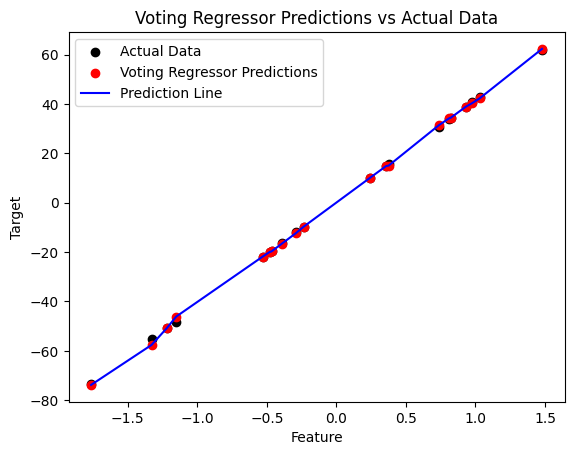

In [23]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Voting Regressor Predictions')
# Line for prediction trend
sorted_indices = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_indices], y_pred[sorted_indices], color='blue', label='Prediction Line')

plt.title('Voting Regressor Predictions vs Actual Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()